# New Shows and Movies

## Assignment


Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

You can start by exploring a few questions:

- What type of content is available in different countries?
- How has the number of movies released per year changed over the last 20-30 years?
- Comparison of tv shows vs. movies.
- What is the best time to launch a TV show?
- Analysis of actors/directors of different types of shows/movies.
- Does Netflix has more focus on TV Shows than movies in recent years?
- Understanding what content is available in different countries.


In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

In [218]:
netflix_data = pd.read_csv('/Users/rosiebai/Desktop/python practice/netflix_data.csv')

In [219]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [220]:
netflix_data.shape

(8807, 12)

In [221]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [222]:
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [223]:
# Data normalization
netflix_data['country'] = netflix_data['country'].str.lstrip(',').str.strip()

netflix_data['cast'] = netflix_data['cast'].fillna('')
netflix_data['cast'] = netflix_data['cast'].apply(lambda x: [name.strip() for name in x.split(',')] if x else [])
df_exploded = netflix_data.explode('cast')

df_exploded['director'] = df_exploded['director'].fillna('')
df_exploded['director'] = df_exploded['director'].apply(lambda x: [name.strip() for name in x.split(',')] if x else [])
df_exploded = df_exploded.explode('director')

df_exploded['listed_in'] = df_exploded['listed_in'].fillna('')
df_exploded['listed_in'] = df_exploded['listed_in'].apply(lambda x: [name.strip() for name in x.split(',')] if x else [])
df_exploded = df_exploded.explode('listed_in')

df_exploded['country'] = df_exploded['country'].fillna('')
df_exploded['country'] = df_exploded['country'].apply(lambda x: [name.strip() for name in x.split(',')] if x else [])
df_exploded = df_exploded.explode('country')
df_exploded.shape

(202033, 12)

In [224]:
# checking the number of countries in this dataset
print('The total number of countries in this dataset:', df_exploded['country'].nunique())

# checking the number of genres
print('The total number of genres in this dataset:', df_exploded['listed_in'].nunique())

The total number of countries in this dataset: 123
The total number of genres in this dataset: 42


## 1. What type of content is available in different countries?


In [225]:
pivot_table1 = df_exploded.groupby(['country','type'])\
.show_id.nunique().reset_index(name = 'count')\
.sort_values( ['country','count'], ascending=[True,False])
pivot_df = pivot_table1[pivot_table1['country'].str.strip() != '']
pivot_df = pivot_df.pivot(index = 'country', columns = 'type', values = 'count').fillna(0)
pivot_df = pivot_df[(pivot_df['Movie']> 0) & (pivot_df['TV Show']> 0) ]
pivot_df['Total'] = pivot_df['Movie'] + pivot_df['TV Show']
pivot_df = pivot_df.sort_values(by = 'Total', ascending= False)
pivot_df_top10 = pivot_df.head(10).astype(int)
pivot_df_top10

type,Movie,TV Show,Total
country,,,
United States,2752,938,3690
India,962,84,1046
United Kingdom,534,272,806
Canada,319,126,445
France,303,90,393
Japan,119,199,318
Spain,171,61,232
South Korea,61,170,231
Germany,182,44,226


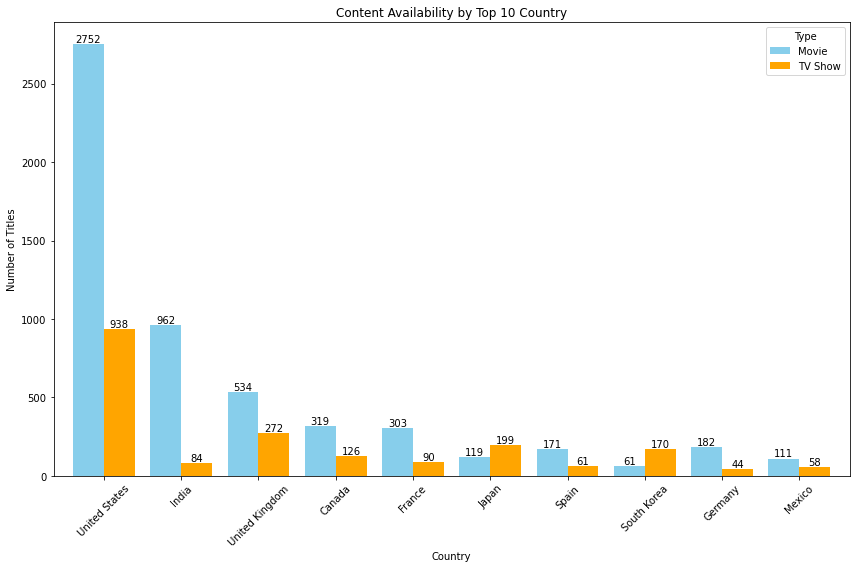

In [226]:
ax = pivot_df_top10[['Movie', 'TV Show']].plot(kind = 'bar', 
                                               figsize = (12, 8), 
                                               width = 0.8, 
                                               color = ['skyblue', 'orange'])
plt.title('Content Availability by Top 10 Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation = 45)
plt.legend(title = 'Type')

# add data labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt = '%.0f')

plt.tight_layout()
plt.show()

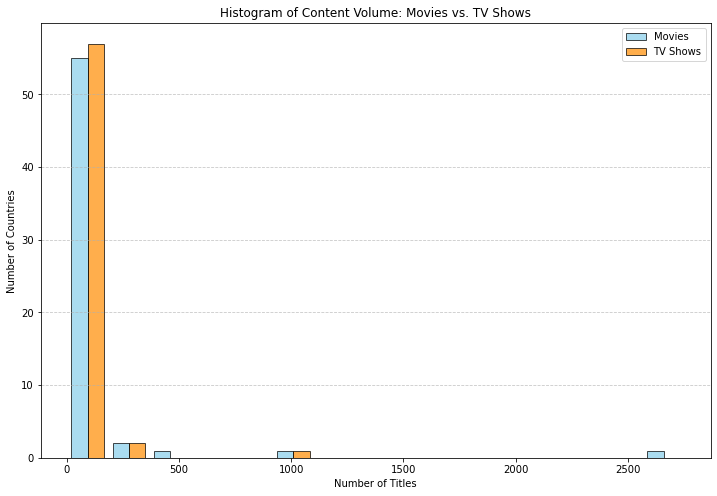

In [227]:
plt.figure(figsize=(12, 8))

# Overlay Histograms
plt.hist(
    [pivot_df['Movie'], pivot_df['TV Show']],
    bins = 15,
    color = ['skyblue', 'darkorange'],
    edgecolor = 'black',
    label = ['Movies', 'TV Shows'],
    alpha = 0.7

)
plt.xlabel('Number of Titles')
plt.ylabel('Number of Countries')
plt.title('Histogram of Content Volume: Movies vs. TV Shows')
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()



## 2. How has the number of movies released per year changed over the last 20-30 years?

In [228]:
pivot_table2 = netflix_data[netflix_data['type'] == 'Movie'].groupby('release_year')\
    .show_id.nunique()\
    .reset_index(name = 'num_show_id')\
    .sort_values(by = 'release_year')
pivot_table2 = pivot_table2[pivot_table2['release_year']> 1990]

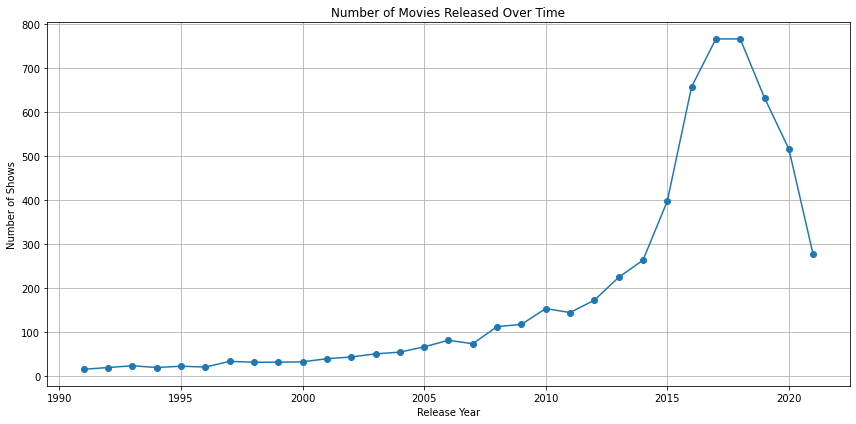

In [229]:
release_year = pivot_table2['release_year'].to_numpy()
num_show_id = pivot_table2['num_show_id'].to_numpy()

plt.figure(figsize=(12, 6))
plt.plot(release_year, num_show_id, marker='o')
plt.title('Number of Movies Released Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.tight_layout()
plt.show()


In [230]:
# In the past 30 years, from 1991 ~ 2021, the percentage of change in the last 30 years
pct_change_in_last_30yr = round((pivot_table2[pivot_table2['release_year']== 2021]['num_show_id'].values[0] -
                            pivot_table2[pivot_table2['release_year']== 1991]['num_show_id'].values[0])/(pivot_table2[pivot_table2['release_year']== 1991]['num_show_id'].values[0]) * 100.0,2)
print('the number of shows released over the past 30 years has increased',pct_change_in_last_30yr, '%')

the number of shows released over the past 30 years has increased 1631.25 %


In [231]:
# In the past 20 years, from 2000 ~ 2021
pct_change_in_last_20yr = round((pivot_table2[pivot_table2['release_year']== 2021]['num_show_id'].values[0] -
                            pivot_table2[pivot_table2['release_year']== 2000]['num_show_id'].values[0])/(pivot_table2[pivot_table2['release_year']== 2000]['num_show_id'].values[0]) * 100.0,2)
print('the number of shows released over the past 20 years has increased',pct_change_in_last_20yr, '%')

the number of shows released over the past 20 years has increased 739.39 %


## 3. Comparison of tv shows vs. movies.

In [232]:
pivot_table3 = df_exploded.groupby(['country','release_year','type'])\
    .show_id.nunique()\
    .reset_index(name = 'num_show_id')\
    .sort_values(by = 'release_year')
pivot_table3 = pivot_table3[pivot_table3['release_year']> 1990]
pivot_table3

,country,release_year,type,num_show_id
85,Belgium,1991,Movie,1
1376,United States,1991,Movie,11
1100,Soviet Union,1991,Movie,1
526,India,1991,Movie,1
635,Italy,1991,Movie,1
...,...,...,...,...
891,Nigeria,2021,TV Show,2
890,Nigeria,2021,Movie,2
324,Egypt,2021,TV Show,1
1150,Sweden,2021,TV Show,1


In [233]:


num_shows_per_country = df_exploded.groupby('country').show_id.nunique().reset_index(name = 'num_show_id').sort_values(by = 'num_show_id', ascending=False)
top10_countries = num_shows_per_country['country'].head(10).to_list()
print('Top 10 countries are ', top10_countries)
tail10_countries = num_shows_per_country['country'].tail(10).to_list()
print('Bottom 10 countries are ',tail10_countries)

Top 10 countries are  ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico']
Bottom 10 countries are  ['Lithuania', 'Afghanistan', 'Latvia', 'Samoa', 'Kazakhstan', 'Jamaica', 'Slovakia', 'Nicaragua', 'Ethiopia', 'Liechtenstein']


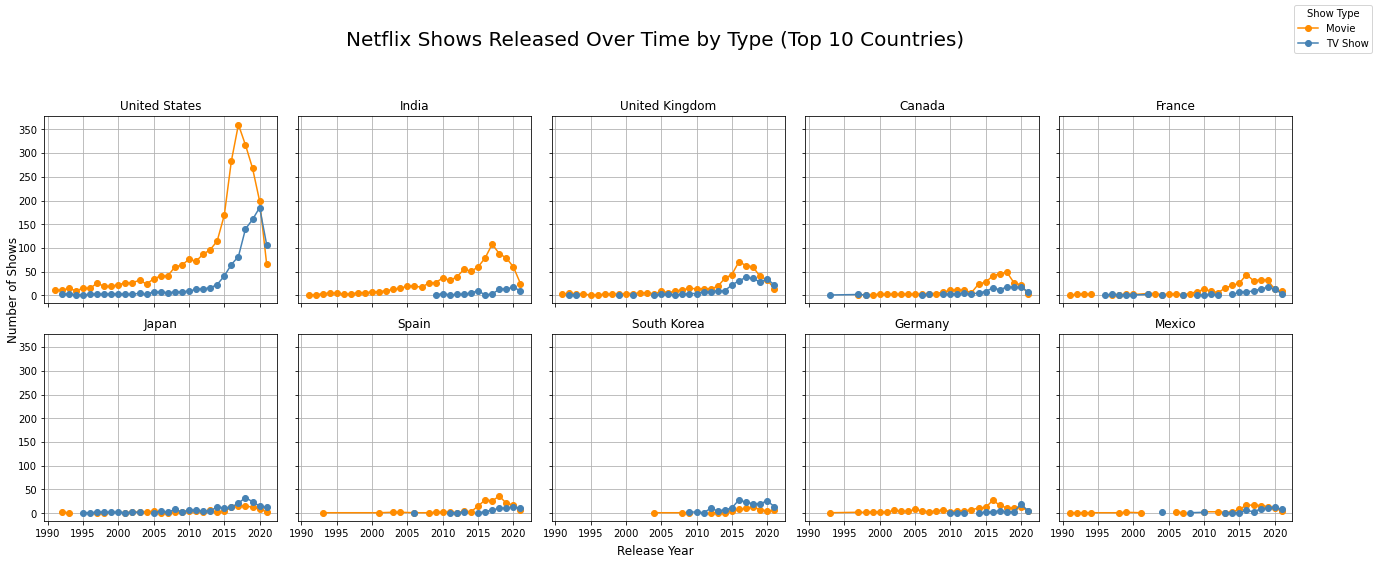

In [234]:
# Set up a 2x5 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each country's data into its respective subplot
for i, country in enumerate(top10_countries):
    pivot_df = pivot_table3[pivot_table3['country'] == country].pivot_table(
        index='release_year',
        columns='type',
        values='num_show_id',
        aggfunc='sum'
    ).sort_index()

    pivot_df.plot(
        kind='line',
        marker='o',
        color={'Movie': 'darkorange', 'TV Show': 'steelblue'},
        ax=axes[i]
    )

    axes[i].set_title(country)
    axes[i].set_xlabel('')  # Optional: remove individual x-labels
    axes[i].set_ylabel('')  # Optional: remove individual y-labels
    axes[i].grid(True)
    axes[i].legend().set_visible(False)  # Hide legend per subplot

# Add shared x/y labels
fig.text(0.5, 0.04, 'Release Year', ha='center', fontsize=12)
fig.text(0.05, 0.5, 'Number of Shows', va='center', rotation='vertical', fontsize=12)
fig.suptitle('Netflix Shows Released Over Time by Type (Top 10 Countries)', 
             fontsize=20, 
             y= 0.95 # this will adjust the spacing between title and subplots 
)

# Add one shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Show Type', loc='upper right', ncol=1)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.90])
plt.show()


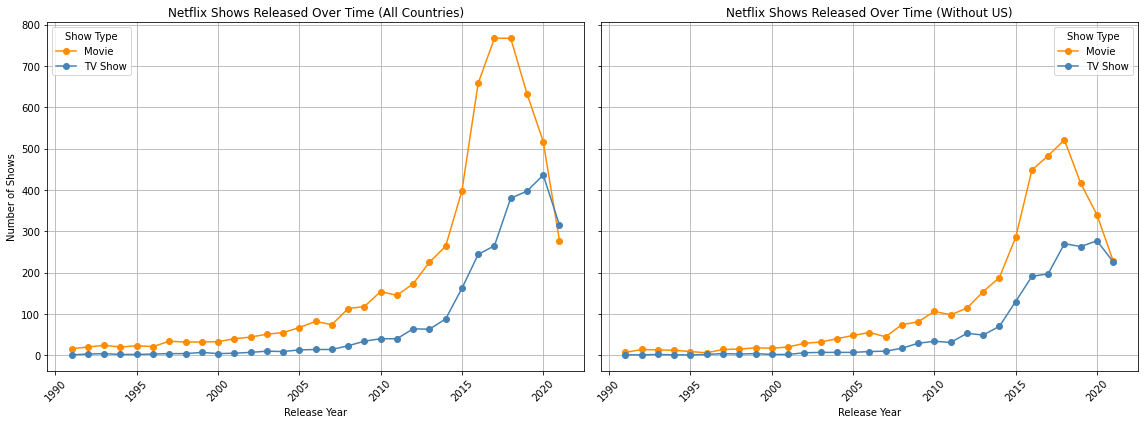

In [235]:
# Prepare: All countries (with US)
pivot_all = netflix_data.groupby(['release_year', 'type']) \
    .show_id.nunique().reset_index(name='num_show_id')
pivot_all = pivot_all[pivot_all['release_year'] > 1990]
pivot_all_df = pivot_all.pivot(index='release_year', columns='type', values='num_show_id').sort_index()

# Prepare: Excluding US
pivot_wo_us = netflix_data[netflix_data['country'] != 'United States'] \
    .groupby(['release_year', 'type']) \
    .show_id.nunique().reset_index(name='num_show_id')
pivot_wo_us = pivot_wo_us[pivot_wo_us['release_year'] > 1990]
pivot_wo_us_df = pivot_wo_us.pivot(index='release_year', columns='type', values='num_show_id').sort_index()

# Create side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

# Plot with US
pivot_all_df.plot(
    kind='line',
    marker='o',
    color={'Movie': 'darkorange', 'TV Show': 'steelblue'},
    ax=axes[0]
)
axes[0].set_title('Netflix Shows Released Over Time (All Countries)')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Number of Shows')
axes[0].grid(True)
axes[0].legend(title='Show Type')
axes[0].tick_params(axis='x', rotation=45)

# Plot without US
pivot_wo_us_df.plot(
    kind='line',
    marker='o',
    color={'Movie': 'darkorange', 'TV Show': 'steelblue'},
    ax=axes[1]
)
axes[1].set_title('Netflix Shows Released Over Time (Without US)')
axes[1].set_xlabel('Release Year')
axes[1].grid(True)
axes[1].legend(title='Show Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


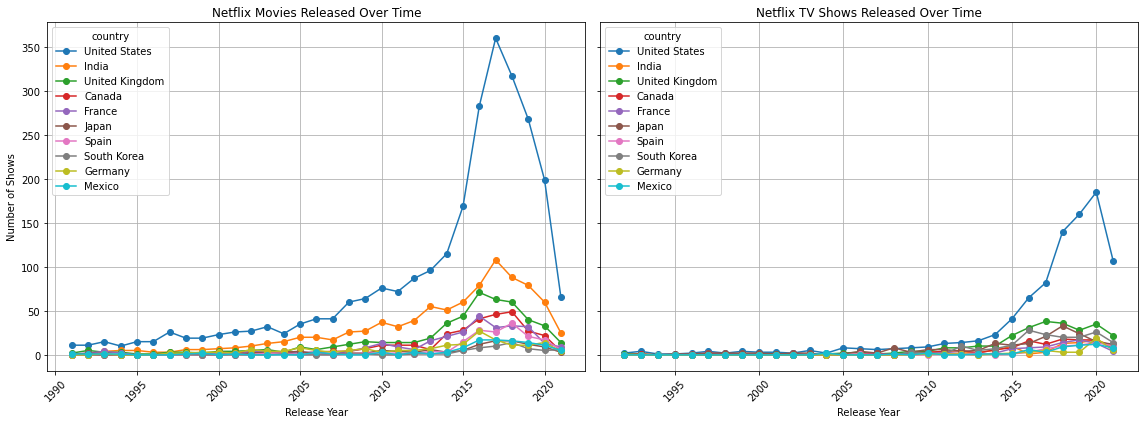

In [236]:
# ==== Movies ====
pivot_movie = df_exploded[df_exploded['type'] == 'Movie'].groupby(['country','release_year'])\
    .show_id.nunique().reset_index(name='num_show_id')
pivot_movie = pivot_movie[pivot_movie['release_year'] > 1990]

pivot_movie_df = pivot_movie.pivot_table(index='release_year',
                                         columns='country',
                                         values='num_show_id',
                                         aggfunc='sum').fillna(0)
pivot_movie_df = pivot_movie_df.sort_index()[top10_countries]

# ==== TV Shows ====
pivot_tv = df_exploded[df_exploded['type'] == 'TV Show'].groupby(['country','release_year'])\
    .show_id.nunique().reset_index(name='num_show_id')
pivot_tv = pivot_tv[pivot_tv['release_year'] > 1990]

pivot_tv_df = pivot_tv.pivot_table(index='release_year',
                                   columns='country',
                                   values='num_show_id',
                                   aggfunc='sum').fillna(0)
pivot_tv_df = pivot_tv_df.sort_index()[top10_countries]

# ==== Plot side by side ====
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

# Plot movies
pivot_movie_df.plot(kind='line', marker='o', ax=axes[0])
axes[0].set_title('Netflix Movies Released Over Time')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Number of Shows')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# Plot TV shows
pivot_tv_df.plot(kind='line', marker='o', ax=axes[1])
axes[1].set_title('Netflix TV Shows Released Over Time')
axes[1].set_xlabel('Release Year')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 4. What is the best time to launch a TV show?


Overall December turned out to be the best month to release TV shows. But different countries have different trends.

In [237]:
# reshape the underlying data to certain format so we can matplotlib
netflix_data['date_added'] = netflix_data['date_added'].str.strip()
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format = '%B %d, %Y').dt.strftime('%Y-%m-%d')
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['release_month'] = netflix_data['date_added'].dt.month

tv_per_month = netflix_data[netflix_data['type'] == 'TV Show'].groupby('release_month').show_id.nunique()\
    .reset_index(name = 'num_show_id').sort_values(by = 'release_month')
tv_per_month 

,release_month,num_show_id
0,1.0,192
1,2.0,181
2,3.0,213
3,4.0,214
4,5.0,193
5,6.0,236
6,7.0,262
7,8.0,236
8,9.0,251
9,10.0,215


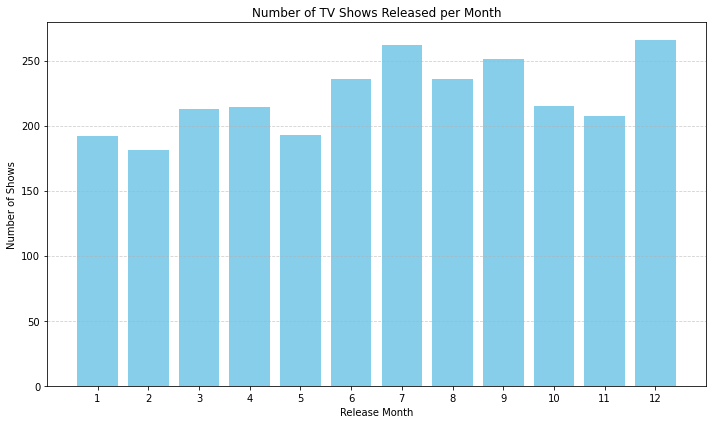

In [238]:

# create the X,Y -axis
release_month = tv_per_month['release_month'].to_numpy()
num_show_id = tv_per_month['num_show_id'].to_numpy()
# create the plot
plt.figure(figsize=(10, 6))
plt.bar(release_month, num_show_id, color = 'skyblue')
plt.title('Number of TV Shows Released per Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Shows')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.xticks(ticks = np.arange(1,13))
plt.tight_layout()
plt.show()

In [239]:
df_exploded['date_added'] = df_exploded['date_added'].str.strip()
df_exploded['date_added'] = pd.to_datetime(df_exploded['date_added'], format = '%B %d, %Y').dt.strftime('%Y-%m-%d')
df_exploded['date_added'] = pd.to_datetime(df_exploded['date_added'])
df_exploded['release_month'] = df_exploded['date_added'].dt.month

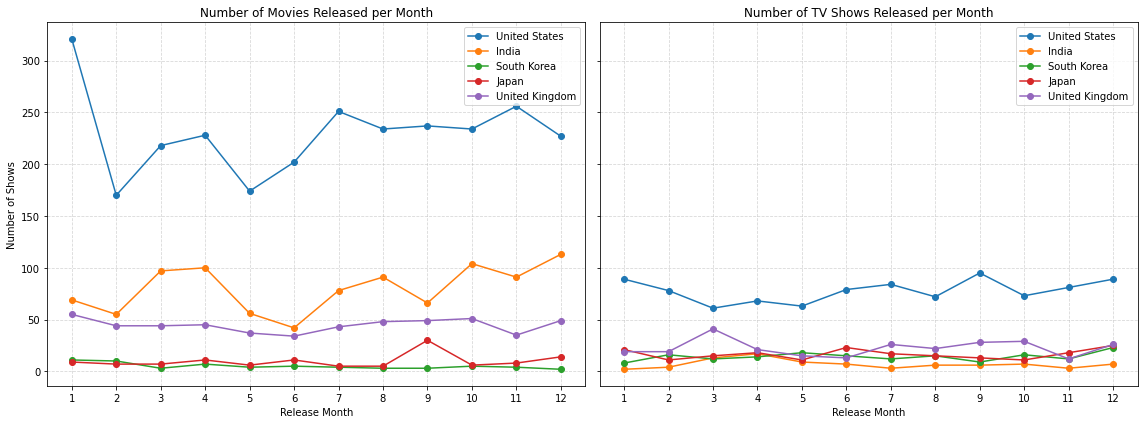

In [250]:
customized_countries = ['United States', 'India', 'South Korea', 'Japan', 'United Kingdom']

# ==== Movies ====
pivot_movie = df_exploded[df_exploded['type'] == 'Movie'].groupby(['country','release_month'])\
    .show_id.nunique().reset_index(name='num_show_id')

pivot_movie_df = pivot_movie.pivot_table(index='release_month',
                                         columns='country',
                                         values='num_show_id',
                                         aggfunc='sum').fillna(0)
pivot_movie_df = pivot_movie_df.sort_index()[customized_countries]

# ==== TV Shows ====
pivot_tv = df_exploded[df_exploded['type'] == 'TV Show'].groupby(['country','release_month'])\
    .show_id.nunique().reset_index(name='num_show_id')

pivot_tv_df = pivot_tv.pivot_table(index='release_month',
                                   columns='country',
                                   values='num_show_id',
                                   aggfunc='sum').fillna(0)
pivot_tv_df = pivot_tv_df.sort_index()[customized_countries]

# ==== Plot side by side ====
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

# Plot movies
pivot_movie_df.plot(kind='line', marker='o', ax=axes[0])
axes[0].set_title('Number of Movies Released per Month')
axes[0].set_xlabel('Release Month')
axes[0].set_ylabel('Number of Shows')
axes[0].set_xticks(range(1, 13))
axes[0].grid(True, linestyle='--', alpha = 0.5)

axes[0].tick_params(axis='x')
axes[0].legend(loc = 'upper right')

# Plot TV shows
pivot_tv_df.plot(kind='line', marker='o', ax=axes[1])
axes[1].set_title('Number of TV Shows Released per Month')
axes[1].set_xlabel('Release Month')
axes[1].set_xticks(range(1, 13))
axes[1].grid(True, linestyle='--', alpha = 0.5)
axes[1].tick_params(axis='x')
axes[1].legend(loc = 'upper right')

plt.tight_layout()
plt.show()


## 5. Analysis of actors/directors of different types of shows/movies.

### Top genres

In [241]:
top_genre_df = df_exploded.groupby(['listed_in'])\
    .show_id.nunique()\
    .reset_index(name = 'count')\
    .sort_values(by = 'count',ascending=False)
top10_genre = top_genre_df['listed_in'].head(10).to_list()
top10_genre

['International Movies',
 'Dramas',
 'Comedies',
 'International TV Shows',
 'Documentaries',
 'Action & Adventure',
 'TV Dramas',
 'Independent Movies',
 'Children & Family Movies',
 'Romantic Movies']

### Top actors by genre

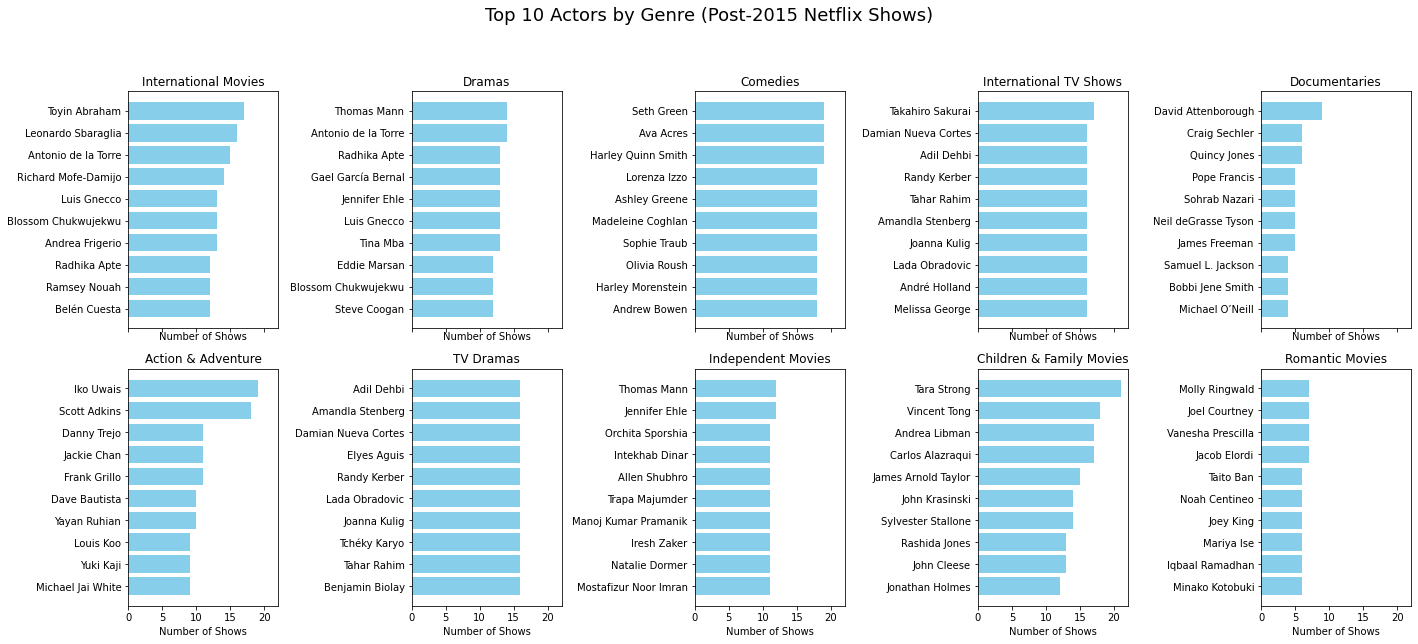

In [242]:
# Aggregate number of shows by actor and genre (after 2015)
top_actors_per_genre = df_exploded[df_exploded['release_year'] > 2015] \
    .groupby(['listed_in', 'cast'])['show_id'] \
    .count().reset_index(name='num_show_id')

# Set up 2x5 grid for top 10 genres
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(22, 10), sharex=True)
axes = axes.flatten()

for i, genre in enumerate(top10_genre):
    # Filter and get top 10 actors for this genre
    genre_df = top_actors_per_genre[top_actors_per_genre['listed_in'] == genre] \
        .sort_values(by='num_show_id', ascending=False).head(10)

    # Plot horizontal bar chart
    axes[i].barh(genre_df['cast'], genre_df['num_show_id'], color='skyblue')
    axes[i].set_title(genre)
    axes[i].invert_yaxis()  # Put the highest bar on top
    axes[i].set_xlabel('Number of Shows')
    axes[i].set_ylabel('')

# Shared title and layout
fig.suptitle('Top 10 Actors by Genre (Post-2015 Netflix Shows)', fontsize=18, y=0.94)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.90])
plt.show()


### Top directors by genre

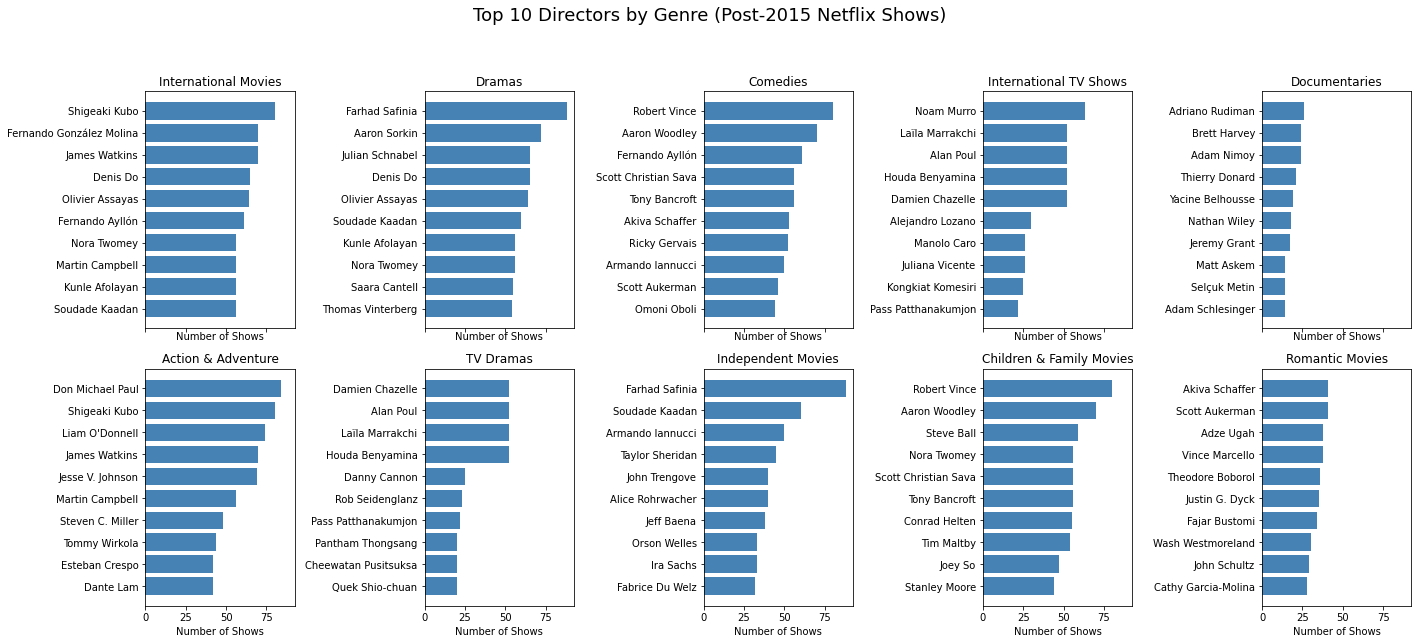

In [243]:
# Aggregate number of shows by director and genre (after 2015)
top_directors_per_genre = df_exploded[df_exploded['release_year'] > 2015] \
    .groupby(['listed_in', 'director'])['show_id'] \
    .count().reset_index(name='num_show_id')

# Set up 2x5 grid for top 10 genres
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(22, 10), sharex=True)
axes = axes.flatten()

for i, genre in enumerate(top10_genre):
    # Filter and get top 10 directors for this genre
    genre_df = top_directors_per_genre[top_directors_per_genre['listed_in'] == genre] \
        .sort_values(by='num_show_id', ascending=False).head(10)

    # Plot horizontal bar chart
    axes[i].barh(genre_df['director'], genre_df['num_show_id'], color='steelblue')
    axes[i].set_title(genre)
    axes[i].invert_yaxis()  # Put the highest bar on top
    axes[i].set_xlabel('Number of Shows')
    axes[i].set_ylabel('')

# Shared title and layout
fig.suptitle('Top 10 Directors by Genre (Post-2015 Netflix Shows)', fontsize=18, y=0.94)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.90])
plt.show()


## 6. Does Netflix has more focus on TV Shows than movies in recent years?

Insights: the movie production peaked around 2017, since then TV shows production started catching up. In 2021, globally the TV shows production has exceeded the movie production. Afterall, TV shows help retain subscribers through multi-episode arcs.
Licensing and co-producing with local studios is cheaper and faster for shows than for blockbuster films.
TV content allows experimentation with genres and styles without massive financial risk.

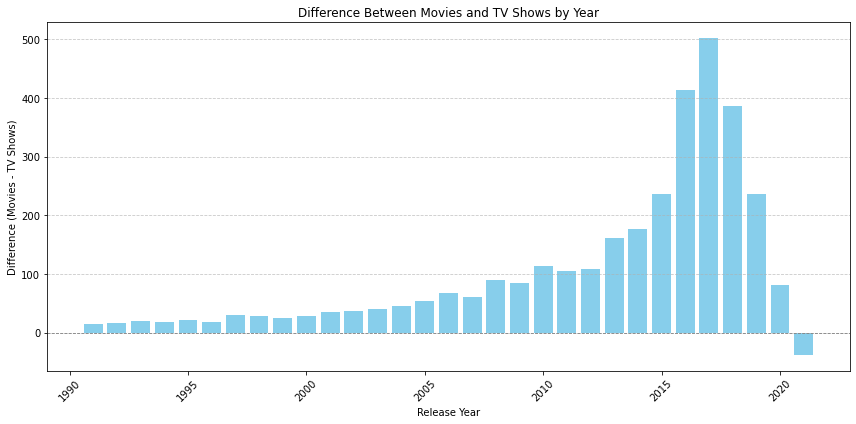

In [244]:
pivot_table8 = netflix_data.groupby(['release_year','type']).show_id.nunique().reset_index(name = 'num_show_id')
df = pivot_table8.pivot(index = 'release_year', columns='type', values = 'num_show_id')
df['difference'] = df['Movie'] - df['TV Show']
df_reset = df.reset_index()
df_clean = df_reset.dropna(subset=['difference'])
df_clean = df_clean[df_clean['release_year']> 1990]

plt.figure(figsize=(12, 6))
plt.bar(df_clean['release_year'], df_clean['difference'], color='skyblue')

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Release Year')
plt.ylabel('Difference (Movies - TV Shows)')
plt.title('Difference Between Movies and TV Shows by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [245]:
pivot_table8 = netflix_data.groupby(['country','release_year','type']).show_id.nunique().reset_index(name = 'num_show_id')
df = pivot_table8.pivot(index = ['country','release_year'], columns='type', values = 'num_show_id')
df['difference'] = df['Movie'] - df['TV Show']
df_reset = df.reset_index()
df_clean = df_reset.dropna(subset=['difference'])
df_clean = df_clean[df_clean['release_year']> 1990]

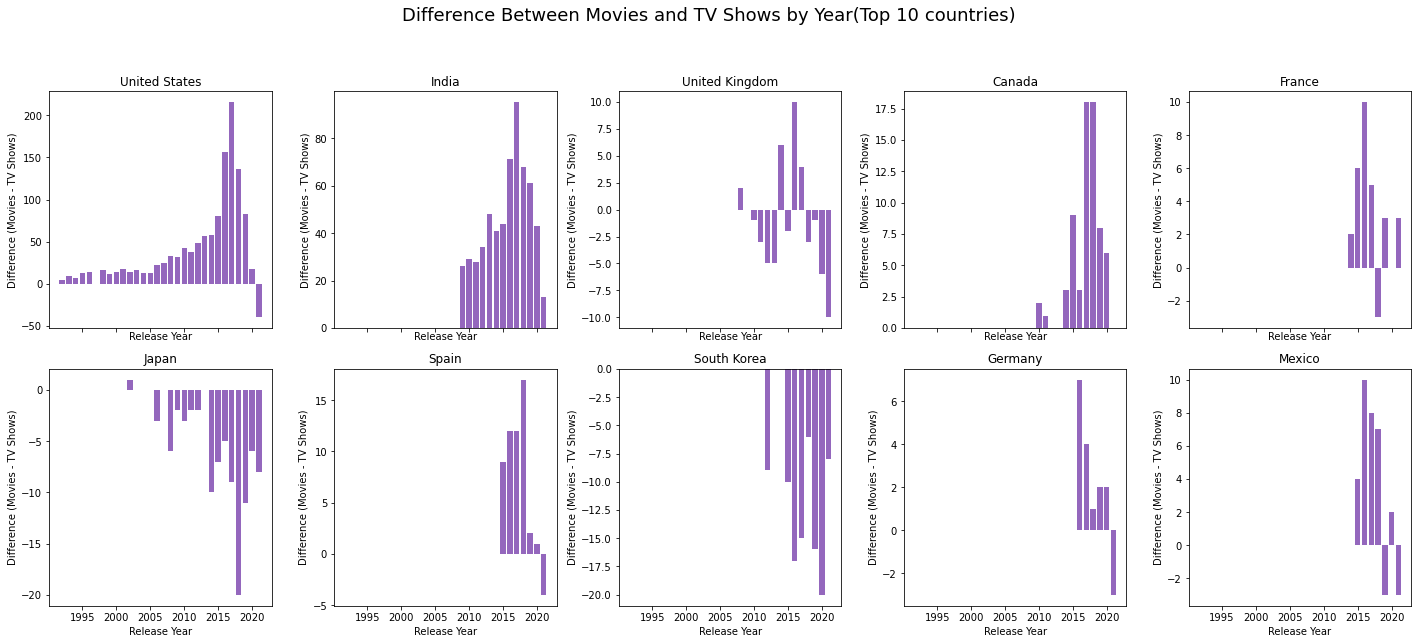

In [246]:
# Set up 2x5 grid for top 10 genres
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(22, 10), sharex=True)
axes = axes.flatten()

for i, country in enumerate(top10_countries):
    temp_df = df_clean[df_clean['country'] == country].sort_values(by = 'release_year')

    # Plot horizontal bar chart
    axes[i].bar(temp_df['release_year'], temp_df['difference'], color='#9467bd')
    axes[i].set_title(country)
    axes[i].set_xlabel('Release Year')
    axes[i].set_ylabel('Difference (Movies - TV Shows)')

# Shared title and layout
fig.suptitle('Difference Between Movies and TV Shows by Year(Top 10 countries)', fontsize=18, y=0.94)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.90])
plt.show()


Insights: 
From the history, countries that produced more TV shows than movies are Japan, South Korea, UK. Countries that produced more movies than TV shows are US, India, Canada, Spain, France.

South Korea
1. K-drama Culture
South Korea has a long-established industry for TV dramas (K-dramas), which are often limited series (16–20 episodes) and heavily promoted domestically and abroad.
K-dramas are a dominant cultural export and are cheaper and faster to produce than films.
2. Streaming Compatibility
TV series (especially romantic, thriller, or historical dramas) are more bingeable and draw longer viewer engagement, which aligns well with Netflix’s algorithms and release strategies.
3. Government and Industry Support
Strong government support for the Korean Wave (Hallyu) has driven TV production.
Korean production companies also often pre-sell or co-produce dramas with platforms like Netflix.

Japan
1. Anime TV Series
A massive portion of Japan’s TV output is anime, which is often serialized and can span dozens or hundreds of episodes.
Anime studios are structured around high-volume TV production rather than feature films.
2. Manga Adaptations
Many popular Japanese TV shows (especially anime or live-action) are based on manga series, which lend themselves better to episodic formats.
3. Domestic Viewing Habits
Japanese audiences have long favored episodic storytelling and franchises (e.g., seasonal anime, J-dramas).
There’s a tradition of producing content for TV slots and streaming, rather than for theater-only audiences.

United States
1. Dominance of the Film Industry
Hollywood has historically been movie-centric, exporting blockbuster films worldwide.
Theatrical releases and movie studios have long defined U.S. entertainment economics.
2. Licensing and Catalog Strategy
Netflix licenses a vast back catalog of American movies (old and new), resulting in high volume on the platform.
Many American TV shows are tied to traditional networks or competitors (e.g., Hulu, Peacock), limiting Netflix’s access.
3. TV Shows Are Often Exclusive Elsewhere
High-profile U.S. shows (e.g., from HBO, ABC, NBC) often stay off Netflix due to licensing rights or exclusivity deals.
In contrast, movies are easier to license in bulk.

India
1. Massive Film Industry
India has the world’s largest film industry by volume (Bollywood, Tollywood, etc.).
Films are produced in multiple languages (Hindi, Tamil, Telugu, etc.), feeding a massive and diverse audience.
2. Theatrical-First Model
Movies dominate both the cultural space and economics of entertainment in India.
Many films are quickly sold to platforms like Netflix post-theatrical release.
3. TV Ecosystem Is Still Evolving for Streaming
Traditional Indian TV (soap operas, family serials) are long-running and not always a good fit for Netflix's binge model.
Streaming-exclusive TV series are growing but still fewer in number than films.

### Top genres by country

Insights:
- US and India are both famous for their dramas, comedies, and action & adventure movies, etc.
- UK is famous for British TV shows, dramas and documentaries.
- Japan is famous for anime series, anime features, action & adventure movies.
- South Korea is famous for Korean TV shows, romantic TV shows.


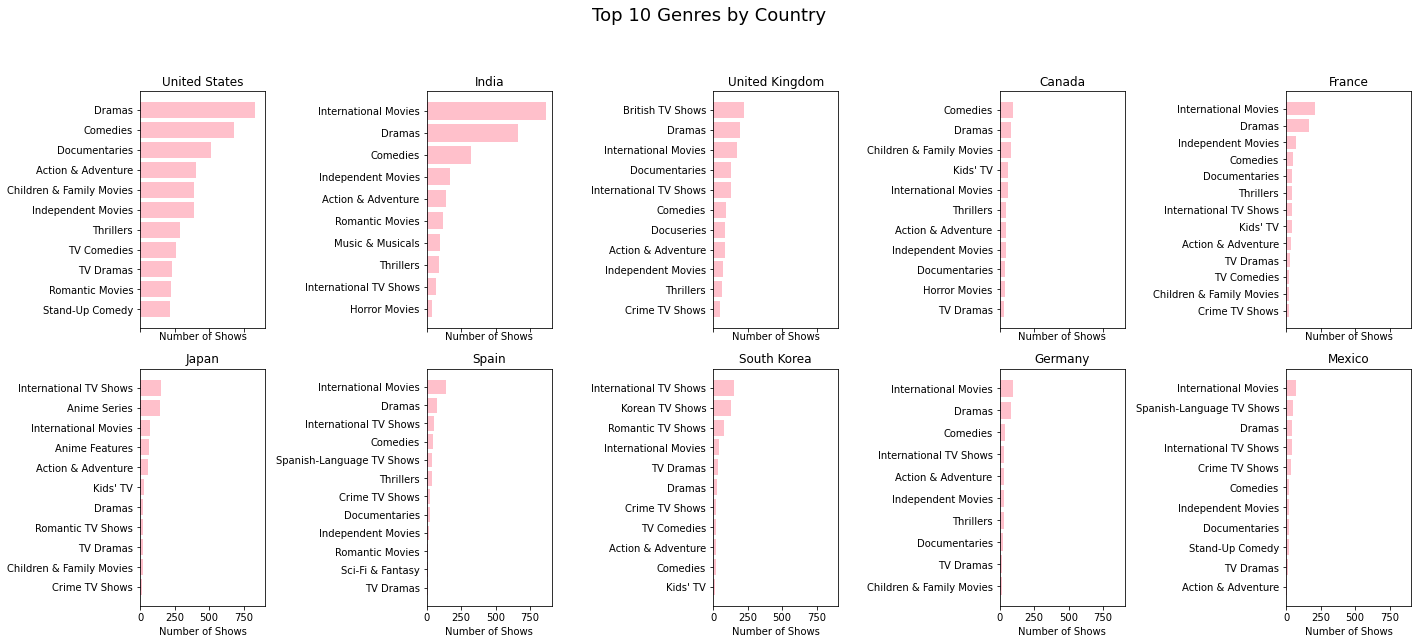

In [247]:
top_genres_per_country = df_exploded.groupby(['country', 'listed_in'])['show_id'].nunique().reset_index(name = 'num_show_id')
top_genres_per_country['rank'] = top_genres_per_country.groupby('country')['num_show_id']\
.rank(method = 'dense', ascending=False)
top_genres_per_country = top_genres_per_country[top_genres_per_country['rank']<= 10].sort_values(by=['country', 'rank'])

# Set up 2x5 grid for top 10 genres
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(22, 10), sharex=True)
axes = axes.flatten()

for i, country in enumerate(top10_countries):
    temp_df = top_genres_per_country[top_genres_per_country['country'] == country]
    # Plot horizontal bar chart
    axes[i].barh(temp_df['listed_in'], temp_df['num_show_id'], color='pink')
    axes[i].set_title(country)
    axes[i].invert_yaxis()  # Put the highest bar on top
    axes[i].set_xlabel('Number of Shows')
    axes[i].set_ylabel('')

# Shared title and layout
fig.suptitle('Top 10 Genres by Country', fontsize=18, y=0.94)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.90])
plt.show()


## 7. Understanding what content is available in different countries.

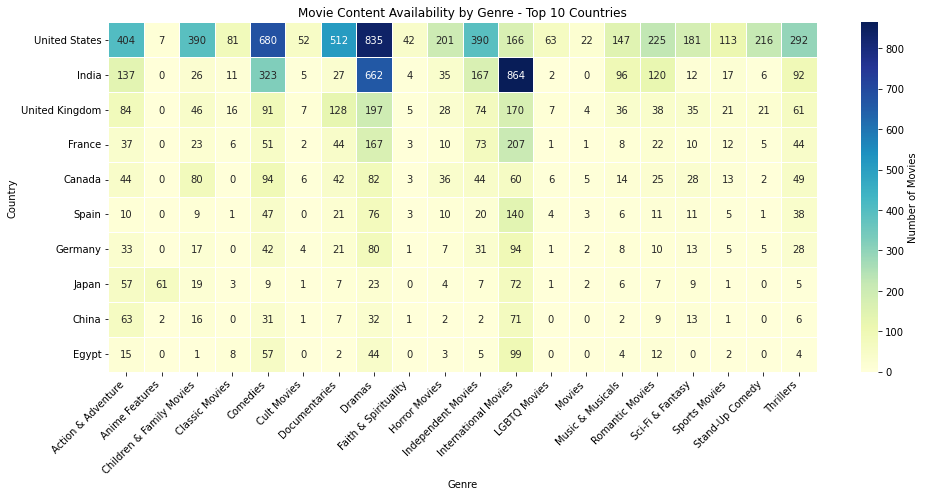

In [248]:
pivot_table9 = df_exploded[df_exploded['type'] == 'Movie'].groupby(['country','listed_in'])\
.show_id.nunique().reset_index(name = 'count')
pivot_df = pivot_table9[pivot_table9['country'].str.strip() != '']
pivot_df = pivot_df.pivot_table(index = ['country'], columns = 'listed_in', values = 'count').fillna(0)
pivot_df['Grand Total'] = pivot_df.sum(axis=1)
pd.set_option("display.max_columns", None)
data = pivot_df.sort_values(by = 'Grand Total', ascending=False).head(10).astype(int)
data = data.drop(columns=['Grand Total']).reset_index()



# Create the DataFrame
df = pd.DataFrame(data)
df.set_index('country', inplace=True)

# Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(df, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Number of Movies'})

plt.title('Movie Content Availability by Genre - Top 10 Countries')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


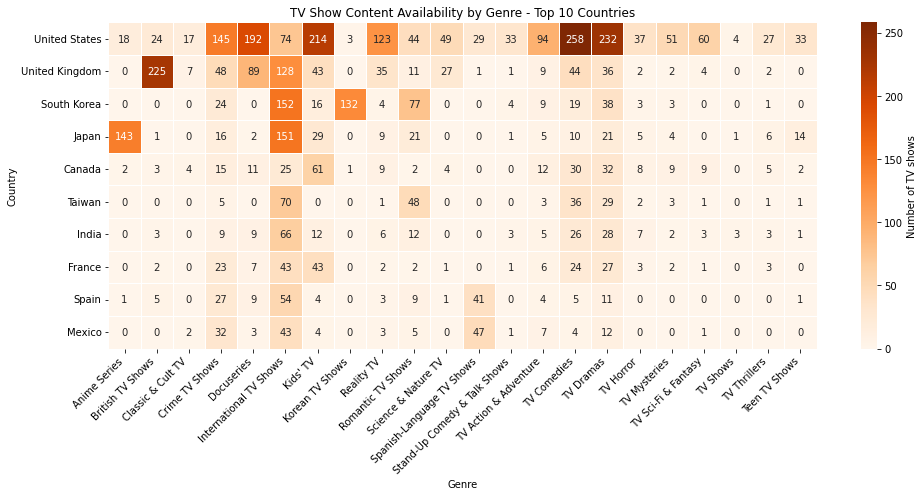

In [249]:
pivot_table9 = df_exploded[df_exploded['type'] == 'TV Show'].groupby(['country','listed_in'])\
.show_id.nunique().reset_index(name = 'count')
pivot_df = pivot_table9[pivot_table9['country'].str.strip() != '']
pivot_df = pivot_df.pivot_table(index = ['country'], columns = 'listed_in', values = 'count').fillna(0)
pivot_df['Grand Total'] = pivot_df.sum(axis=1)
pd.set_option("display.max_columns", None)
data = pivot_df.sort_values(by = 'Grand Total', ascending=False).head(10).astype(int)
data = data.drop(columns=['Grand Total']).reset_index()


# Create the DataFrame
df = pd.DataFrame(data)
df.set_index('country', inplace=True)

# Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(df, annot=True, fmt='d', cmap='Oranges', linewidths=0.5, cbar_kws={'label': 'Number of TV shows'})

plt.title('TV Show Content Availability by Genre - Top 10 Countries')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Recommendations:

If we want to decide which type of shows/movies to produce and how we can grow the business in different countries. Here are some recommendations: 
Audiences across different countries have diverse tastes and cultural preferences when it comes to entertainment. To grow our global presence and retain engagement, we need to adopt a country-specific content strategy tailored to local viewing behaviors and expectations.
- **United States**
The U.S. is the most prolific content market, with a strong legacy in dramas, comedies, documentaries, action & adventure, and family films. These categories consistently perform well and should remain a core part of our acquisition and production strategy.
That said, we should not limit ourselves to mainstream genres — independent films, thrillers, and niche storytelling can help us stand out and cater to evolving audience interests.
- **India**
India is home to the largest film industry in the world, with a strong cultural affinity for movies, especially dramas and comedies. While traditional TV formats (e.g., soap operas and family serials) are still prominent, they may not align well with Netflix’s binge-friendly model.
We recommend focusing on high-quality international and regional movies, expanding in comedic and dramatic films, and selectively experimenting with modern TV formats tailored for streaming audiences.
- **South Korea**
Korea has become a global hub for romantic dramas and K-dramas, supported by strong government and industry backing. While continuing to invest in TV dramas, we should also explore genre innovation — introducing thrillers, sci-fi, youth-focused stories, or limited docuseries — to avoid fatigue from overly familiar content.
Balancing audience expectations with creative novelty is key to sustaining growth in this market.
- **Japan**
Japan excels in anime series and films, which continue to drive engagement both domestically and internationally. Additionally, there is strong interest in narrative-driven dramas and high-concept storytelling.
We recommend doubling down on anime production and licensing, while also investing in live-action dramas with deep character arcs and emotional storytelling.
- **United Kingdom**
The UK audience shows strong engagement with TV series and documentaries, particularly those with high production value, strong writing, and cultural relevance.
We suggest continuing to invest in British dramas, mystery/thriller series, and true-crime documentaries, which have broad appeal beyond the UK as well.
- **Global Strategy**
TV shows drive habitual engagement and platform stickiness — expanding serialized content should remain a strategic priority.
We must continue to diversify content portfolios to reflect evolving viewer tastes. Repetition of the same genres on users' homepages can lead to viewer fatigue.
By investing in genre variety and regional storytelling, and by promoting personalized discovery, we can enhance retention and keep audiences coming back for fresh, relevant content.
